<a href="https://colab.research.google.com/github/Andreluizfc/AI-study/blob/master/exercises/neural_networks/Fashion_MNIST_Classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de classificação simples - Functional AP

Neste exemplo vamos realizar a classificação de imagens com o módulo Functional API do tf2

O Functional API permete criar modelos com mais flexibilidade que o módulo Sequential. Como topologias não lineares, pesos compartilhados, por exemplo, possibilitando criar Redes Siamesas, GANs, dentre outros

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Neste exemplo vamos utilizar o dataset Fashion Mnist, um dataset de peça de roupas que herda parte do nome do clássifo Mnist de números escritos a mão.

O dataset está disponível nas bibliotecas do tensorflow, já no formato de dataset do TF

In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

O dataset possui 60 mil exemplos de treino e 10 mil exemplos de teste divididos em 10 classes. As classes estão já representadas numericamente, e cada label representa:

* 0	Camisetas/Top (T-shirt/top)
* 1	Calça (Trouser)
* 2	Suéter (Pullover)
* 3	Vestidos (Dress)
* 4	Casaco (Coat)
* 5	Sandálias (Sandal)
* 6	Camisas (Shirt)
* 7	Tênis (Sneaker)
* 8	Bolsa (Bag)
* 9	Botas (Ankle boot)


In [6]:
#Função auxiliar para plotar imagem

def plot_img(img):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

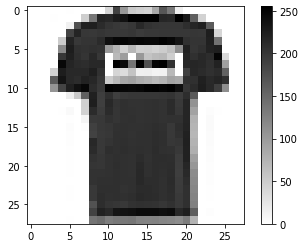

In [8]:
plot_img(train_images[1])

Um passo importante para um treinamento estável é normalizar os daos para que tenham o valores entre 0 e 1. Como nas imagens do nosso dataset os pixels possuem valor de 0 a 255, basta dividir tudo por 255

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Criando e salvando um modelo

No módulo *Sequential*, a rede é criada a partir de uma lista de *layers* colocadas em sequência.

No Funcional API, cada *layer* é criada individualmente, e elas recebem como entrada saídas de outras *layers*. Isso proporciona mais maleabilidade, podendo uma saída ser entrada de duas camadas, propciando a criação de Redes Siamesas e Skip Conection

In [ ]:
def create_model(layers):
  x_in = tf.keras.Input(shape=(28, 28))
  x = tf.keras.layers.Flatten()(x_in)
  
  for i, layer_size in enumerate(layers):
    x = tf.keras.layers.Dense(layer_size, activation='relu')(x)
  
  output = tf.keras.layers.Dense(10, activation='softmax')(x)
  
  model = tf.keras.Model(inputs=x_in, outputs=output)
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
my_model = create_model([128, 128])

In [ ]:
my_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.fit(x=train_images, y=train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2516 - accuracy: 0.9040
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2429 - accuracy: 0.9090
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2339 - accuracy: 0.9113
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2268 - accuracy: 0.9132
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2158 - accuracy: 0.9163


Teste do modelo

In [ ]:
my_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8815


[0.33747297525405884, 0.8815000057220459]

In [ ]:
img = test_images[0]
img = (np.expand_dims(img,0))
class_names[test_labels[0]]

'Ankle boot'

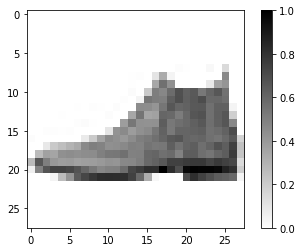

In [ ]:
plot_img(test_images[0])

In [ ]:
preds = my_model.predict(img)
preds

array([[3.2199743e-05, 2.1869339e-06, 1.2368987e-05, 4.5043034e-05,
        1.8541940e-04, 3.8284680e-03, 5.0796098e-05, 7.7377610e-02,
        6.7592066e-07, 9.1846532e-01]], dtype=float32)

Salvando o modelo treinado

In [ ]:
my_model.save('fasion_mnist.h5')

In [ ]:
loaded_models = tf.keras.models.load_model('fasion_mnist.h5')

In [ ]:
loaded_models.predict(img)

## Definindo uma arquitetura com CNN

In [33]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [36]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

In [67]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [69]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels), callbacks=callback)

Epoch 1/20
938/938 [==============================] - 50s 54ms/step - loss: 0.6984 - accuracy: 0.8049 - val_loss: 0.3991 - val_accuracy: 0.8564
Epoch 2/20
938/938 [==============================] - 51s 54ms/step - loss: 0.3434 - accuracy: 0.8756 - val_loss: 0.4118 - val_accuracy: 0.8556
Epoch 3/20
938/938 [==============================] - 51s 55ms/step - loss: 0.3096 - accuracy: 0.8890 - val_loss: 0.3731 - val_accuracy: 0.8781
Epoch 4/20
938/938 [==============================] - 51s 55ms/step - loss: 0.2908 - accuracy: 0.8965 - val_loss: 0.3624 - val_accuracy: 0.8845
Epoch 5/20
938/938 [==============================] - 51s 55ms/step - loss: 0.2881 - accuracy: 0.8971 - val_loss: 0.3716 - val_accuracy: 0.8747
Epoch 6/20
938/938 [==============================] - 51s 55ms/step - loss: 0.2843 - accuracy: 0.9002 - val_loss: 0.3888 - val_accuracy: 0.8601
Epoch 7/20
938/938 [==============================] - 51s 55ms/step - loss: 0.2836 - accuracy: 0.9011 - val_loss: 0.4740 - val_accuracy:

In [70]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.4346 - accuracy: 0.8743


[0.43463101983070374, 0.8743000030517578]

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

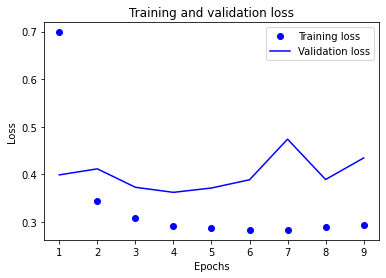

In [72]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

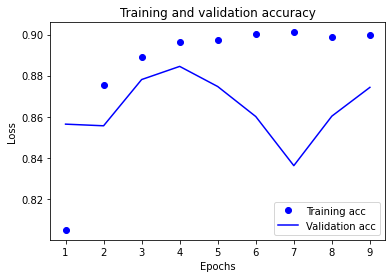

In [73]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

A partir da época 4 o modelo pareceu ter um overfit

In [83]:
 # plot diagnostic learning curves
def plot_loss(history):
  # plot loss
  
  plt.title('Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy

def plot_acc(history):
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.show()

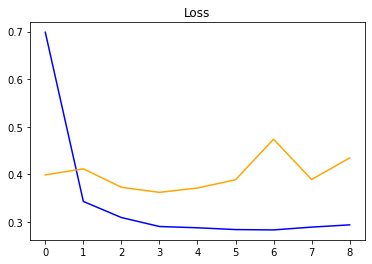

In [84]:
plot_loss(history)

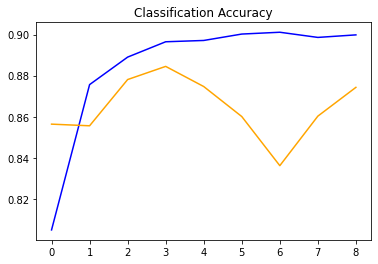

In [86]:
plot_acc(history)